# Google Drive connection

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Packages and Libraries

In [2]:
import pandas as pd
import numpy as np
from numpy import array
import seaborn as sns

import matplotlib.colors
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from IPython.display import display, HTML


### Removing Warnings

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Reading Data

In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/cse445 dataset/diabetes.csv')
dataset



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
dataset.shape

(768, 9)

In [6]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Showing the Attribute Names

In [7]:
col = dataset.columns
col

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Data Analysis and Preprocessing

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Checking Null Values

In [9]:
dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Ploting Null Values

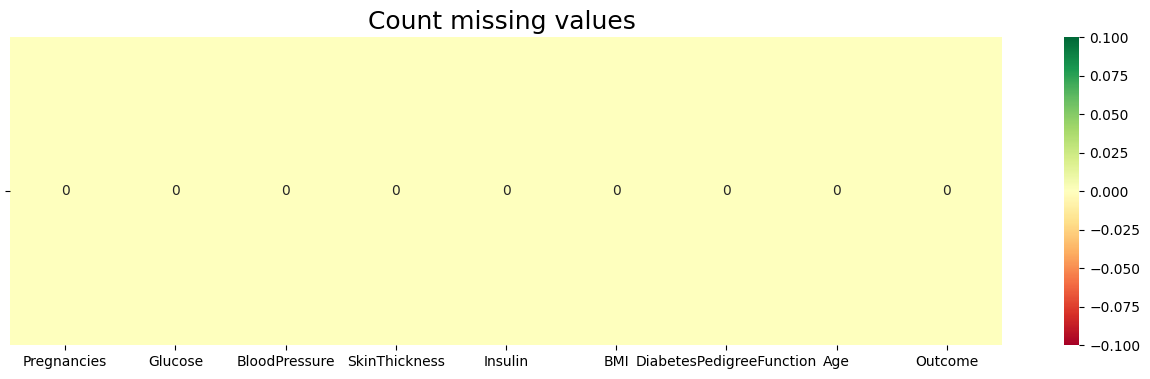

In [10]:
plt.figure(figsize=(16,4))
sns.heatmap((dataset.isna().sum()).to_frame(name='').T,cmap='RdYlGn', annot=True,
             fmt='0.0f').set_title('Count missing values ', fontsize=18)
plt.show()

### Checking Duplicate in each Rows and Columns

In [11]:
duplicates_columns = dataset.duplicated()
print("Number of duplicates in each column:",duplicates_columns.sum())

duplicates_rows = dataset.duplicated(keep=False)
print("Number of duplicate rows:",duplicates_rows.sum())

Number of duplicates in each column: 0
Number of duplicate rows: 0


### Checking Unique values for each Attributes

In [12]:
for i in sorted(dataset, key=lambda x: len(dataset[x].unique())):
    print(i, ":", len(dataset[i].unique()))

Outcome : 2
Pregnancies : 17
BloodPressure : 47
SkinThickness : 51
Age : 52
Glucose : 136
Insulin : 186
BMI : 248
DiabetesPedigreeFunction : 517


### Data Statistics

In [13]:
dataset.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Plotting data to see how the distribution of Feature attributes with Target attribute

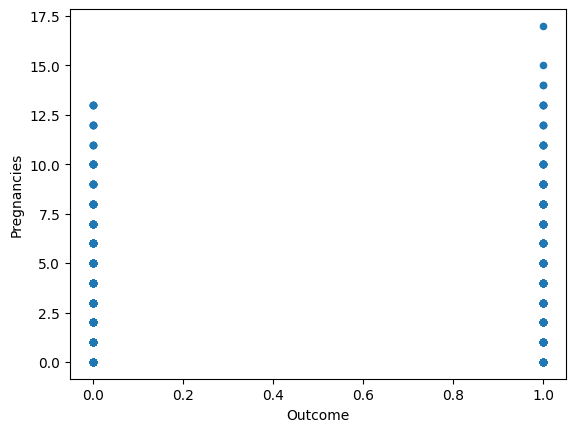

In [14]:
import matplotlib.pyplot as plt
dataset.plot(x='Outcome', y='Pregnancies', kind='scatter')
plt.show()

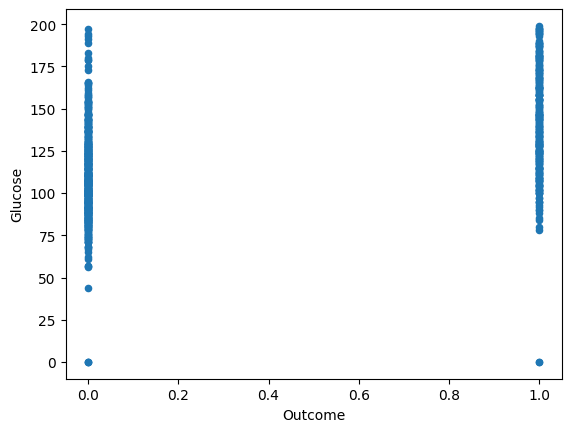

In [15]:
dataset.plot(x='Outcome', y='Glucose', kind='scatter')
plt.show()

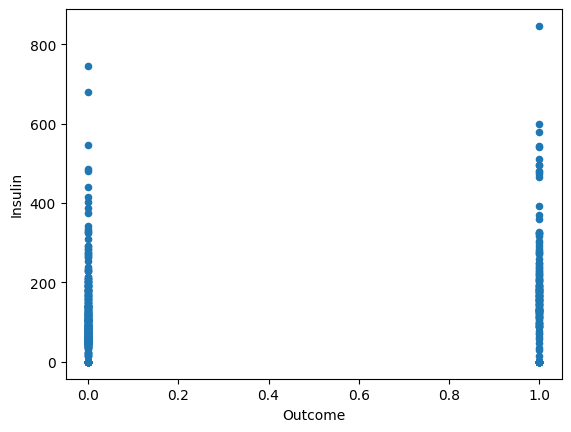

In [16]:
dataset.plot(x='Outcome', y='Insulin', kind='scatter')
plt.show()

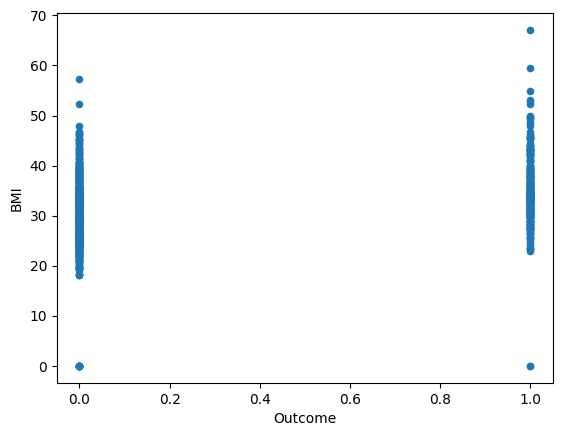

In [17]:
dataset.plot(x='Outcome', y='BMI', kind='scatter')
plt.show()

### Correlation Heatmap of attributes

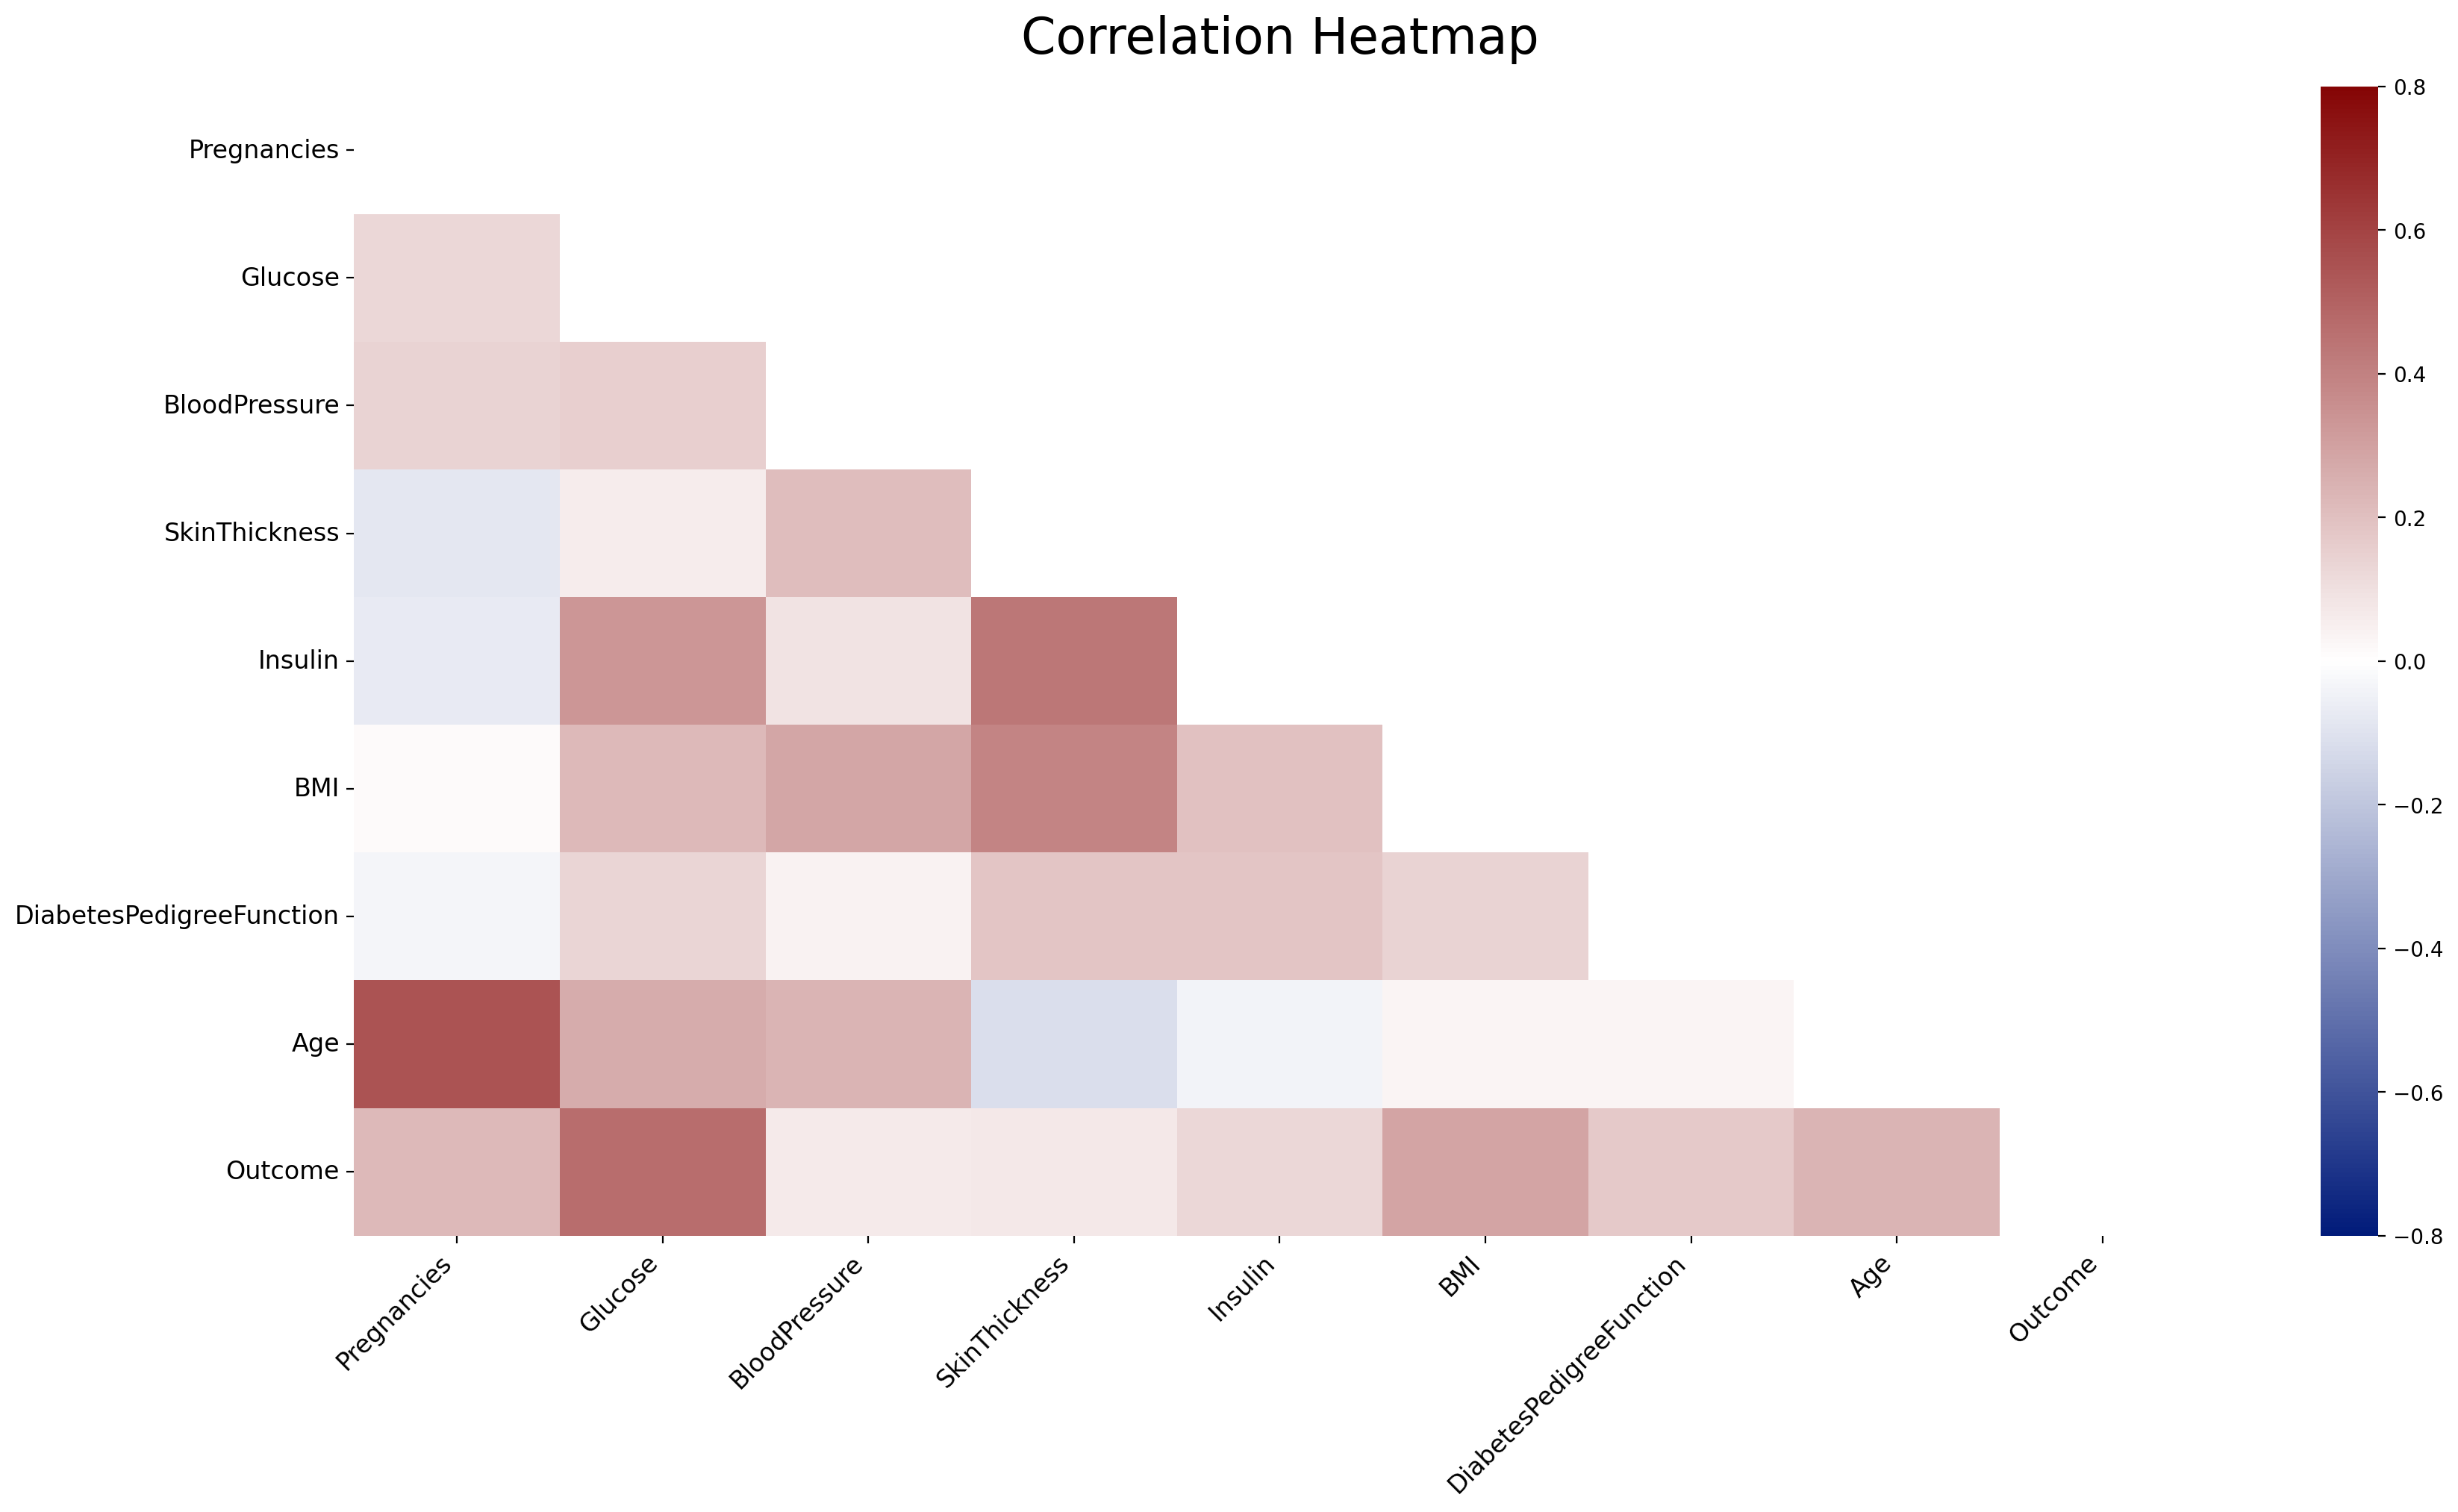

In [18]:
import matplotlib as mpl

data_heatmap = dataset
custom_cmap = mpl.colors.LinearSegmentedColormap.from_list('custom', ['#011b7a', 'white', '#850505'])

mask = np.triu(np.ones_like(data_heatmap.corr(), dtype=bool))

lenghtsize = 20
fig, ax = plt.subplots(figsize=(lenghtsize,lenghtsize*.50), dpi=200)

heatmap = sns.heatmap(data_heatmap.corr(), cmap=custom_cmap, mask=mask, annot=False, vmin=-.8, vmax=.8)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':24}, pad=16);
ax.tick_params(axis='both', which='major', labelsize=12)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right');

### Checking Outliers by plotting

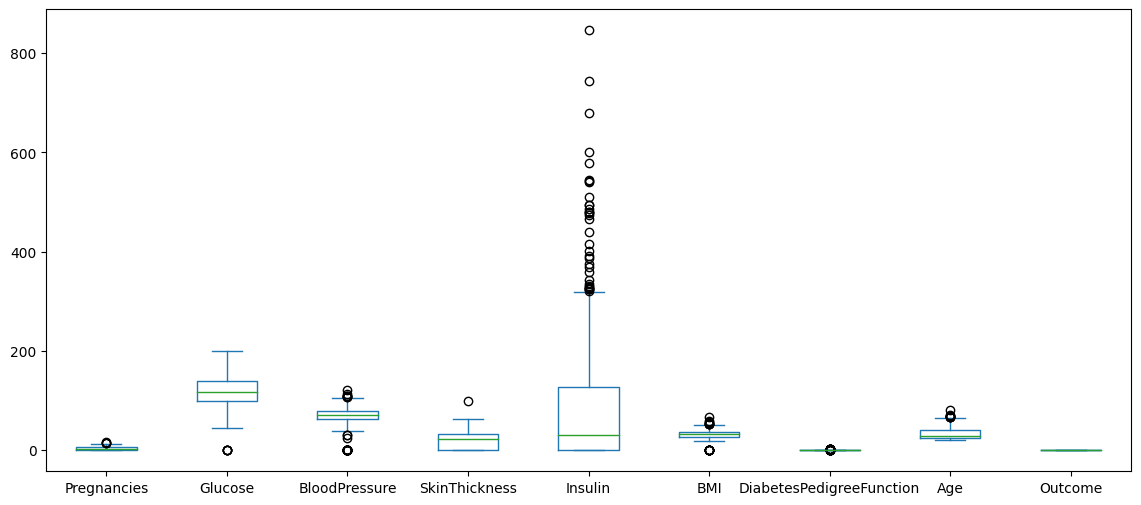

In [19]:
dataset.plot(kind='box',figsize=(14,6))
plt.show()

### Outlier counting

In [20]:
from tabulate import tabulate

# Create an empty list to store outlier information for each column
outliers = []

# Loop over each column in the DataFrame
for col in dataset.columns:
    # Calculate the first and third quartiles
    q1 = dataset[col].quantile(0.25)
    q3 = dataset[col].quantile(0.75)

    # Calculate the interquartile range (IQR)
    iqr = q3 - q1

    # Calculate the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Find the outliers in the column
    col_outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)][col]

    # Add the outlier information to the list
    outliers.append({
        'Column': col,
        'Total Count': len(dataset[col]),
        'Outlier Count': len(col_outliers),
        'Outlier Values': col_outliers.values
    })

# Display the results in a table format
print(tabulate(outliers, headers='keys', tablefmt='fancy_grid'))

╒══════════════════════════╤═══════════════╤═════════════════╤══════════════════════════════════════════════════════════════════════════╕
│ Column                   │   Total Count │   Outlier Count │ Outlier Values                                                           │
╞══════════════════════════╪═══════════════╪═════════════════╪══════════════════════════════════════════════════════════════════════════╡
│ Pregnancies              │           768 │               4 │ [15 17 14 14]                                                            │
├──────────────────────────┼───────────────┼─────────────────┼──────────────────────────────────────────────────────────────────────────┤
│ Glucose                  │           768 │               5 │ [0 0 0 0 0]                                                              │
├──────────────────────────┼───────────────┼─────────────────┼──────────────────────────────────────────────────────────────────────────┤
│ BloodPressure            │      

### Correlation between the attributes those have large number of outlier and Target attribute

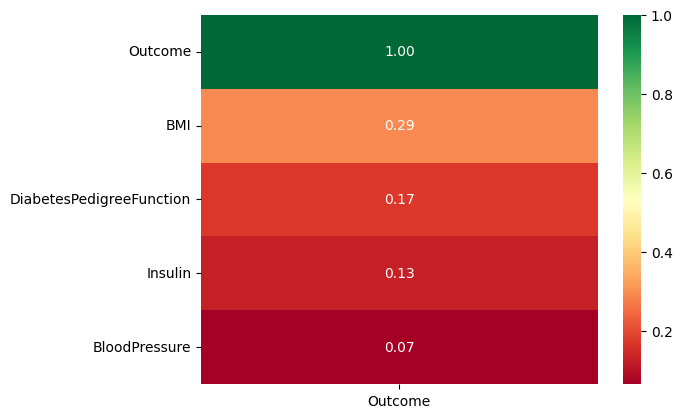

In [21]:

# Select the columns of interest
columns_of_interest = ['BloodPressure','Insulin','BMI','DiabetesPedigreeFunction', 'Outcome']

# Calculate the correlation matrix between the selected columns
corr = dataset[columns_of_interest].corr()['Outcome'].sort_values(ascending=False)

# Display the correlation matrix for the selected columns as a heatmap
sns.heatmap(corr.to_frame(), cmap='RdYlGn', annot=True, fmt='.2f');

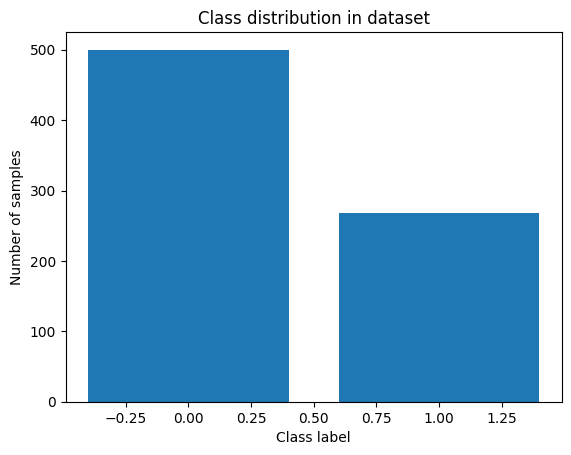

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Assume that y is a list or array containing the class labels of your dataset
unique_labels, counts = np.unique(dataset.Outcome, return_counts=True)

plt.bar(unique_labels, counts)
plt.xlabel('Class label')
plt.ylabel('Number of samples')
plt.title('Class distribution in dataset')
plt.show()

### Observing the difference created by outliers using Z-score test

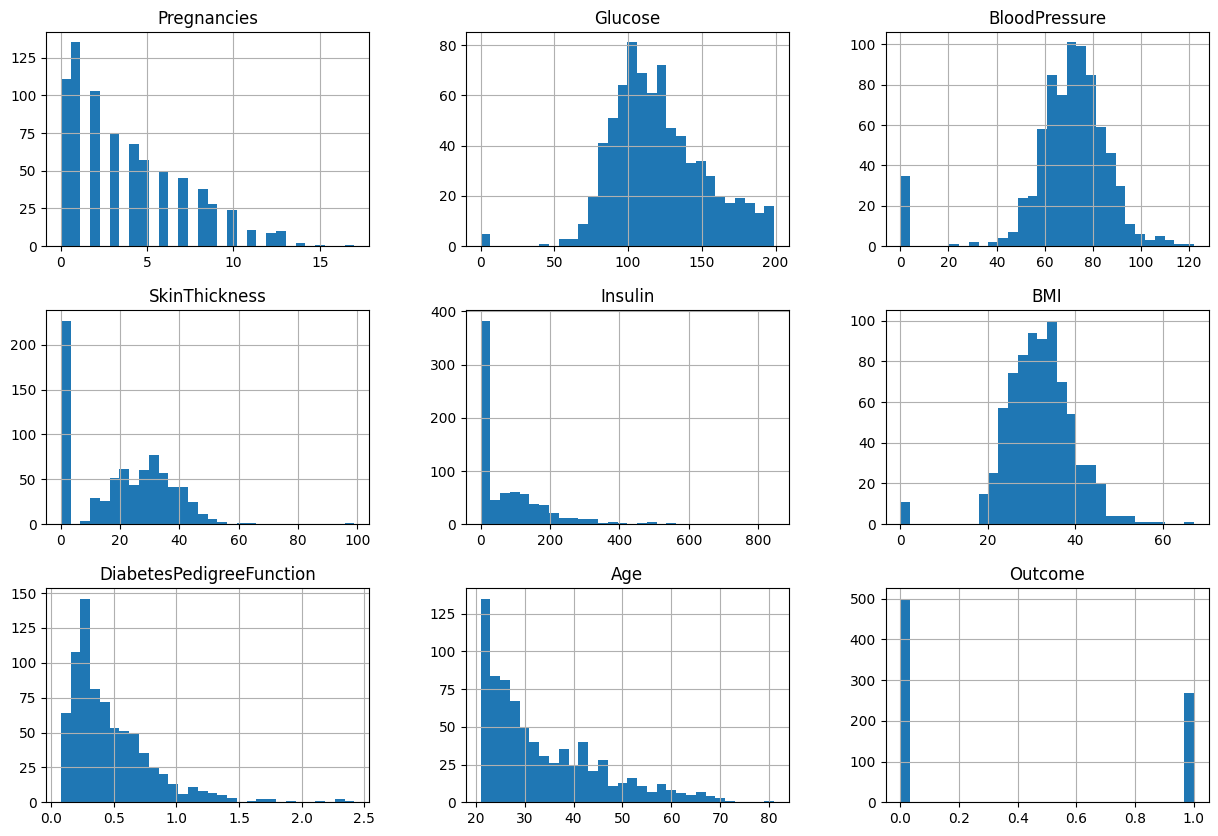

Original dataframe shape: (768, 9)
Filtered dataframe shape: (688, 9)


In [23]:

# Visual inspection - plot a histogram of each column to identify any unusual patterns
dataset.hist(bins=30, figsize=(15,10))
plt.show()

# Statistical tests - identify outliers using the Z-score test
from scipy.stats import zscore

z_scores = dataset.apply(zscore)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
dataset_filtered = dataset[filtered_entries]

# Compare the filtered and unfiltered data
print(f"Original dataframe shape: {dataset.shape}")
print(f"Filtered dataframe shape: {dataset_filtered.shape}")

### Outlier Handling

In [24]:
# Outlier Analysis
def outlier_thresholds(dataframe, col_name, q1=0.20, q3=0.80):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

# We are checking the outlier analysis again for control
for col in dataset.columns:
    print(col, check_outlier(dataset, col))



Pregnancies True
Glucose True
BloodPressure True
SkinThickness True
Insulin True
BMI True
DiabetesPedigreeFunction True
Age True
Outcome False


In [25]:
# We are replacing the outliers according to the IQR method.
def replace_with_thresholds(dataframe, variable, q1=0.20, q3=0.80):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.20, q3=0.80)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in dataset.columns:
    replace_with_thresholds(dataset, col)

In [26]:
# We are checking the outlier analysis again for control
for col in dataset.columns:
    print(col, check_outlier(dataset, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False
Outcome False


# Feature Selection

### Data Cleaning

In [27]:
#Replace Zeroes with mean values
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness', 'BMI','Insulin']

for column in zero_not_accepted:
    dataset[column] = dataset[column].replace(0,np.NaN)
    mean = int(dataset[column].mean(skipna=True))
    dataset[column] = dataset[column].replace(np.NaN,mean)

In [28]:
dataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,147.0,33.6,0.6270,50.0,1.0
1,1,85,66,29.0,147.0,26.6,0.3510,31.0,0.0
2,8,183,64,29.0,147.0,23.3,0.6720,32.0,1.0
3,1,89,66,23.0,94.0,28.1,0.1670,21.0,0.0
4,0,137,40,35.0,168.0,43.1,1.3884,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.0,180.0,32.9,0.1710,63.0,0.0
764,2,122,70,27.0,147.0,36.8,0.3400,27.0,0.0
765,5,121,72,23.0,112.0,26.2,0.2450,30.0,0.0
766,1,126,60,29.0,147.0,30.1,0.3490,47.0,1.0


### Correlation with Target attribute

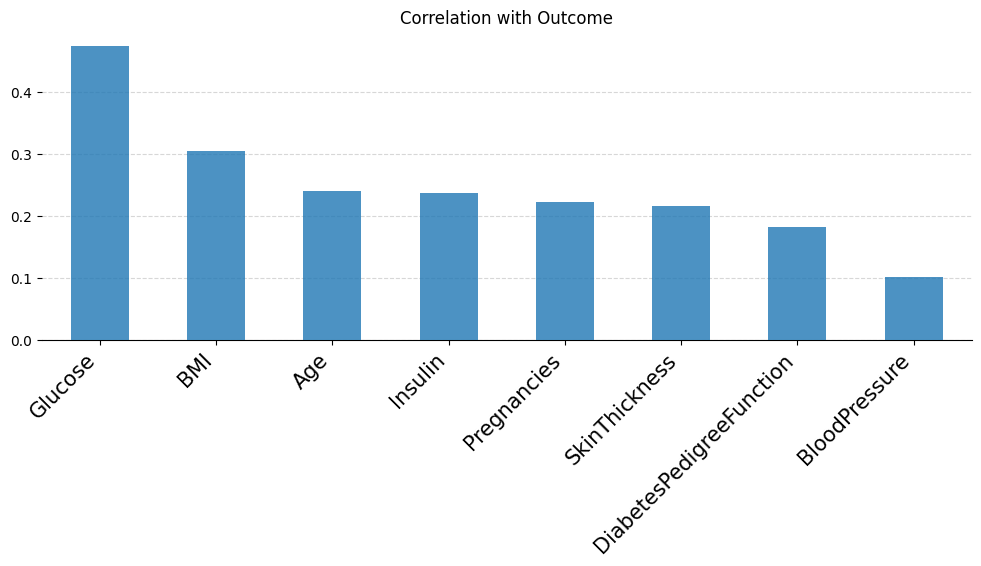

In [29]:
(dataset.drop('Outcome', axis=1)
   .corrwith(dataset.Outcome)
   .sort_values(ascending=False)
   .plot(kind='bar', figsize=(12, 4), title="Correlation with Outcome", alpha=0.8, zorder=3)
   .spines[['top','right', 'left']].set_visible(False)
   )
plt.grid(axis='y', linestyle='--', alpha=.5)
plt.xticks(rotation = 45, ha='right', size=15);

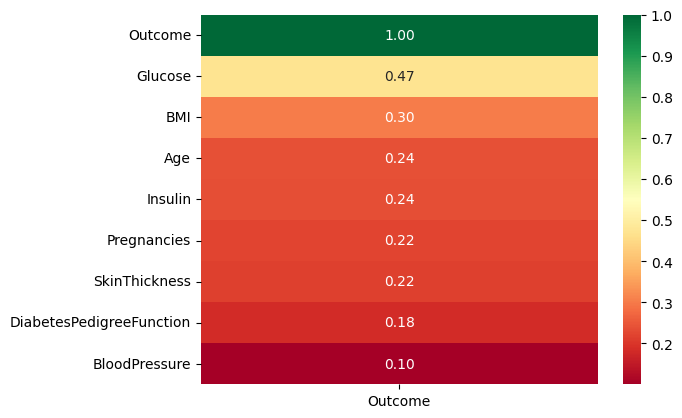

In [30]:
corr = dataset.corr()['Outcome'].sort_values(ascending=False)
sns.heatmap(corr.to_frame(), cmap='RdYlGn', annot=True, fmt='.2f');

### Using ExtraTreesClassifier to find the best feature

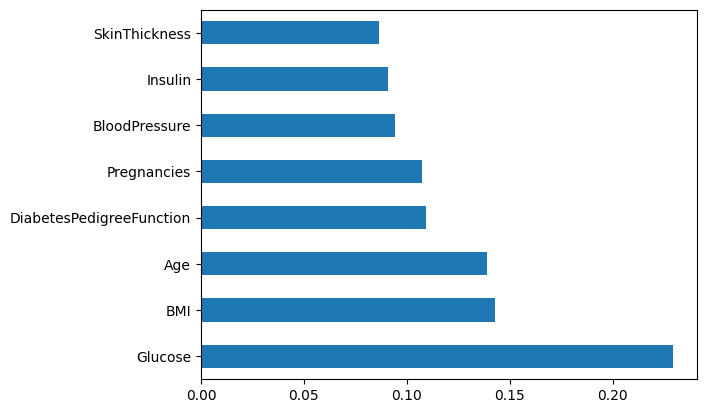

In [31]:

from sklearn.ensemble import ExtraTreesClassifier

# Split the dataset into X and y
X = dataset.drop(columns=["Outcome"])
y = dataset["Outcome"]

# initialize ExtraTreesClassifier
model = ExtraTreesClassifier()

# fit the model to your dataset
model.fit(X, y)

# plot feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

### Using SelectKBest to get more efficient feature

In [32]:

from sklearn.feature_selection import SelectKBest, chi2

# Split the dataset into X and y
X = dataset.drop(columns=["Outcome"])
y = dataset["Outcome"]

# Select the top 10 features with the highest ANOVA F-value
k = 8
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)

# Define feature names
feature_names = list(X.columns)

# Create a pandas dataframe of feature scores
scores_df = pd.DataFrame({'Feature': feature_names, 'Score': selector.scores_})

# Sort the dataframe by feature scores in descending order
scores_df = scores_df.sort_values('Score', ascending=False).reset_index(drop=True)

# Print the dataframe
print(scores_df)

                    Feature        Score
0                   Glucose  1412.839409
1                   Insulin  1268.739094
2                       Age   182.480280
3                       BMI   120.127438
4               Pregnancies   111.027046
5             SkinThickness    92.046303
6             BloodPressure    25.955584
7  DiabetesPedigreeFunction     4.911958


### Combining SelectKBest with ExtraTreesClassifier

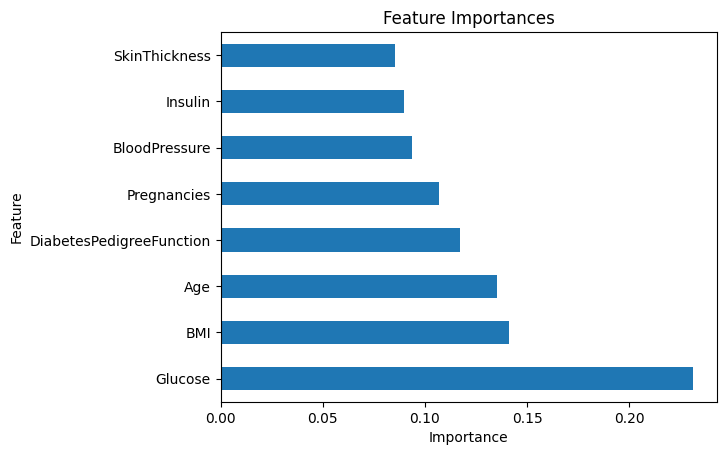

In [33]:

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, chi2

# Split the dataset into X and y
X = dataset.drop(columns=["Outcome"])
y = dataset["Outcome"]

# Feature selection with SelectKBest
k = 8
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)

# Get the selected feature names
feature_names = X.columns[selector.get_support()]

# Feature importance with ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_new, y)

# Plot the feature importances
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances.nlargest(k).plot(kind='barh')
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

### List of columns sorted by Pearson correlation

In [34]:

pear_coor = (dataset.drop('Outcome', axis=1).corrwith(dataset.Outcome).abs().sort_values(ascending=False))
pear_coor

Glucose                     0.472751
BMI                         0.303764
Age                         0.239968
Insulin                     0.235812
Pregnancies                 0.221692
SkinThickness               0.215241
DiabetesPedigreeFunction    0.181521
BloodPressure               0.100662
dtype: float64

In [35]:
pear_coor[pear_coor>0.05]

Glucose                     0.472751
BMI                         0.303764
Age                         0.239968
Insulin                     0.235812
Pregnancies                 0.221692
SkinThickness               0.215241
DiabetesPedigreeFunction    0.181521
BloodPressure               0.100662
dtype: float64

### Feature selection using SelectionKBest

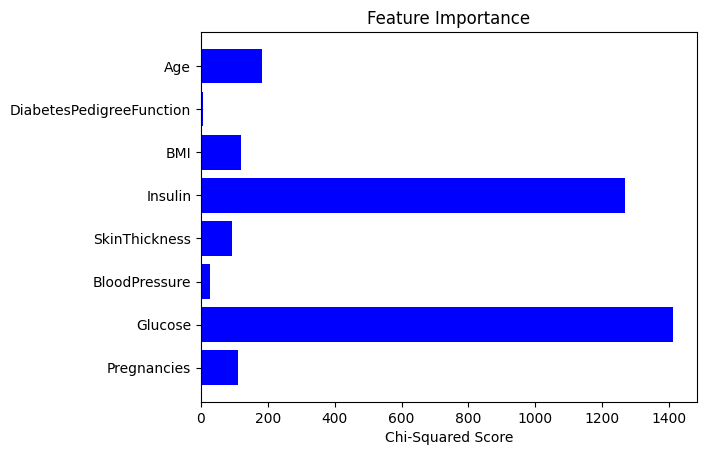

In [36]:
from sklearn.feature_selection import SelectKBest, chi2


# Split the data into features and target variable
X = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']

# Create a SelectKBest object
selector = SelectKBest(score_func=chi2, k=8)

# Fit the selector to the data
selector.fit(X, y)

# Get the indices of the selected features
selected_features = selector.get_support()

# Print the names of the selected features
# print(X.columns[selected_features])

# Get the names of the selected features
feature_names = X.columns[selected_features]

# Plotting the bar diagram
scores = selector.scores_[selected_features]
y_pos = np.arange(len(feature_names))


plt.barh(y_pos, scores, align='center', color='blue')
plt.yticks(y_pos, feature_names)
plt.xlabel('Chi-Squared Score')

plt.title('Feature Importance')

plt.show()

# Determining Test Size Using Cross Validation Score

### Checking the ratio of Target attribute in dataset

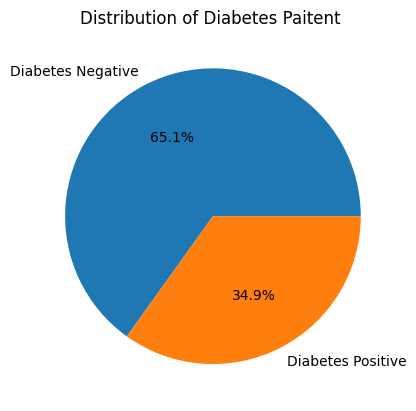

In [37]:
# Count the frequency of each price range category
counts = dataset['Outcome'].value_counts()

# Create a pie chart
plt.pie(counts.values, labels=['Diabetes Negative','Diabetes Positive'], autopct='%1.1f%%')
plt.title('Distribution of Diabetes Paitent ')
plt.show()

In [38]:
counts = dataset['Outcome'].value_counts()
counts

0.0    500
1.0    268
Name: Outcome, dtype: int64

### Observing Decision Tree Test Size

In [39]:

from sklearn.tree import DecisionTreeClassifier

# Load data from CSV file
# ds = pd.read_csv('/content/drive/MyDrive/cse445 dataset/diabetes.csv')

# Split the data into training and testing sets
X = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']

# Define range of test sizes to try
test_sizes = np.arange(0.1, 0.5, 0.05)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Repeat the cross-validation 5 times and store the results in a list
n_runs = 5
results = []
for run in range(n_runs):
    scores = []
    for test_size in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        score = np.mean(cross_val_score(clf, X_train, y_train, cv=5))
        scores.append(score)
    results.append(scores)

# Convert the results to a dataframe
results_df = pd.DataFrame(results, columns=[f"Test Size {ts:.2f}" for ts in test_sizes])

# Highlight the highest result in each row
results_highlighted = results_df.style.highlight_max(color='#f46d43', axis=1)

# Print the highlighted results in a table format
print("Results for Decision Tree Classifier:")
html = results_highlighted.render()
display(HTML(html))

Results for Decision Tree Classifier:


,Test Size 0.10,Test Size 0.15,Test Size 0.20,Test Size 0.25,Test Size 0.30,Test Size 0.35,Test Size 0.40,Test Size 0.45
0,0.725023,0.711568,0.685579,0.678261,0.703773,0.683253,0.715217,0.680196
1,0.716359,0.706988,0.693789,0.683478,0.705746,0.663212,0.715217,0.673137
2,0.714889,0.697804,0.693816,0.683478,0.698235,0.687232,0.693478,0.663641
3,0.704734,0.705414,0.680741,0.695652,0.681481,0.693232,0.702174,0.673165
4,0.725034,0.697827,0.700293,0.676522,0.701921,0.691273,0.717391,0.685042


### Observing K-Nearest Neighbors Test Size

In [40]:

from sklearn.neighbors import KNeighborsClassifier

# Load data from CSV file
# ds = pd.read_csv('/content/drive/MyDrive/cse445 dataset/diabetes.csv')

# Split the data into training and testing sets
X = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']


# Define range of test sizes to try
test_sizes = np.arange(0.1, 0.5, 0.05)

# Create a K Nearest Neighbors classifier
clf = KNeighborsClassifier()

# Create a standard scaler object
std = StandardScaler()

# Repeat the cross-validation 5 times and store the results in a list
n_runs = 5
results = []
for run in range(n_runs):
    scores = []
    for test_size in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        # Scale the data using the standard scaler object
        X_train_std = std.fit_transform(X_train)
        X_test_std = std.transform(X_test)
        clf.fit(X_train_std, y_train)
        score = np.mean(cross_val_score(clf, X_train_std, y_train, cv=5))
        scores.append(score)
    results.append(scores)

# Convert the results to a dataframe
results_df = pd.DataFrame(results, columns=[f"Test Size {ts:.2f}" for ts in test_sizes])

# Highlight the highest result in each row
results_highlighted = results_df.style.highlight_max(color='#f46d43', axis=1)

# Print the highlighted results in a table format
print("K-Nearest Neighbors Algorithm:")
html = results_highlighted.render()
display(HTML(html))

K-Nearest Neighbors Algorithm:


,Test Size 0.10,Test Size 0.15,Test Size 0.20,Test Size 0.25,Test Size 0.30,Test Size 0.35,Test Size 0.40,Test Size 0.45
0,0.754009,0.765308,0.755764,0.756522,0.761578,0.753475,0.717391,0.727563
1,0.754009,0.765308,0.755764,0.756522,0.761578,0.753475,0.717391,0.727563
2,0.754009,0.765308,0.755764,0.756522,0.761578,0.753475,0.717391,0.727563
3,0.754009,0.765308,0.755764,0.756522,0.761578,0.753475,0.717391,0.727563
4,0.754009,0.765308,0.755764,0.756522,0.761578,0.753475,0.717391,0.727563


### Observing Multinomial Naive Bayes Test Size

In [41]:

from sklearn.naive_bayes import MultinomialNB

# Load data from CSV file
# ds = pd.read_csv('/content/drive/MyDrive/cse445 dataset/diabetes.csv')

# Split the data into training and testing sets
X = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']


# Define range of test sizes to try
test_sizes = np.arange(0.1, 0.5, 0.05)

# Create a Multinomial Naive Bayes classifier
clf = MultinomialNB()

# Repeat the cross-validation 5 times and store the results in a list
n_runs = 5
results = []
for run in range(n_runs):
    scores = []
    for test_size in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        clf.fit(X_train, y_train)
        score = np.mean(cross_val_score(clf, X_train, y_train, cv=5))
        scores.append(score)
    results.append(scores)

# Convert the results to a dataframe
results_df = pd.DataFrame(results, columns=[f"Test Size {ts:.2f}" for ts in test_sizes])

# Highlight the highest result in each row
results_highlighted = results_df.style.highlight_max(color='#f46d43', axis=1)

# Print the highlighted results in a table format
print("Multinomial Naive Bayes Algorithm:")
html = results_highlighted.render()
display(HTML(html))

Multinomial Naive Bayes Algorithm:


,Test Size 0.10,Test Size 0.15,Test Size 0.20,Test Size 0.25,Test Size 0.30,Test Size 0.35,Test Size 0.40,Test Size 0.45
0,0.664269,0.658027,0.661282,0.660870,0.661215,0.651434,0.641304,0.637619
1,0.664269,0.658027,0.661282,0.660870,0.661215,0.651434,0.641304,0.637619
2,0.664269,0.658027,0.661282,0.660870,0.661215,0.651434,0.641304,0.637619
3,0.664269,0.658027,0.661282,0.660870,0.661215,0.651434,0.641304,0.637619
4,0.664269,0.658027,0.661282,0.660870,0.661215,0.651434,0.641304,0.637619


### Observing Artificial Neural Network Test Size

In [42]:
from sklearn.neural_network import MLPClassifier

# Load data from CSV file
# ds = pd.read_csv('/content/drive/MyDrive/cse445 dataset/diabetes.csv')

# Split the data into training and testing sets
X = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']

# Define range of test sizes to try
test_sizes = np.arange(0.1, 0.5, 0.05)

# Create an MLPClassifier (Artificial Neural Network)
clf = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

# Create a standard scaler object
std = StandardScaler()

# Repeat the cross-validation 5 times and store the results in a list
n_runs = 5
results = []
for run in range(n_runs):
    scores = []
    for test_size in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        # Scale the data using the standard scaler object
        X_train_std = std.fit_transform(X_train)
        X_test_std = std.transform(X_test)
        clf.fit(X_train_std, y_train)
        score = np.mean(cross_val_score(clf, X_train_std, y_train, cv=5))
        scores.append(score)
    results.append(scores)

# Convert the results to a dataframe
results_df = pd.DataFrame(results, columns=[f"Test Size {ts:.2f}" for ts in test_sizes])

# Highlight the highest result in each row
results_highlighted = results_df.style.highlight_max(color='#f46d43', axis=1)

# Print the highlighted results in a table format
print("Artificial Neural Network (ANN):")
html = results_highlighted.render()
display(HTML(html))


Artificial Neural Network (ANN):


,Test Size 0.10,Test Size 0.15,Test Size 0.20,Test Size 0.25,Test Size 0.30,Test Size 0.35,Test Size 0.40,Test Size 0.45
0,0.738046,0.745332,0.737758,0.744348,0.746677,0.749455,0.734783,0.715742
1,0.738046,0.745332,0.737758,0.744348,0.746677,0.749455,0.734783,0.715742
2,0.738046,0.745332,0.737758,0.744348,0.746677,0.749455,0.734783,0.715742
3,0.738046,0.745332,0.737758,0.744348,0.746677,0.749455,0.734783,0.715742
4,0.738046,0.745332,0.737758,0.744348,0.746677,0.749455,0.734783,0.715742


### Observing Random Forest Test Size

In [43]:

from sklearn.ensemble import RandomForestClassifier

# Load data from CSV file
# ds = pd.read_csv('/content/drive/MyDrive/cse445 dataset/diabetes.csv')

# Split the data into training and testing sets
X = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']

# Define range of test sizes to try
test_sizes = [0.1, 0.2, 0.3, 0.4]


# Create a Random Forest classifier
clf = RandomForestClassifier()

# Repeat the cross-validation 10 times and store the results in a list
n_runs = 5
results = []
for run in range(n_runs):
    scores = []
    for test_size in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        clf.fit(X_train, y_train)
        score = cross_val_score(clf, X_train, y_train, cv=5).mean()
        scores.append(score)
    results.append(scores)

# Convert the results to a dataframe
results_df = pd.DataFrame(results, columns=[f"Test Size {ts:.1f}" for ts in test_sizes])

# Highlight the highest result in each row
results_highlighted = results_df.style.highlight_max(color='#f46d43', axis=1)

# Print the highlighted results in a table format
print("Random Forest Algorithm:")
html = results_highlighted.render()
display(HTML(html))

Random Forest Algorithm:


,Test Size 0.1,Test Size 0.2,Test Size 0.3,Test Size 0.4
0,0.761182,0.776916,0.770907,0.769565
1,0.759775,0.767133,0.772776,0.769565
2,0.761224,0.775263,0.770907,0.771739
3,0.761255,0.773664,0.763534,0.773913
4,0.775686,0.768746,0.778349,0.750000


# Training the Models

### Separating the training and testing sets

In [44]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,147.0,33.6,0.6270,50.0,1.0
1,1,85,66,29.0,147.0,26.6,0.3510,31.0,0.0
2,8,183,64,29.0,147.0,23.3,0.6720,32.0,1.0
3,1,89,66,23.0,94.0,28.1,0.1670,21.0,0.0
4,0,137,40,35.0,168.0,43.1,1.3884,33.0,1.0


In [45]:
# Split dataset into input features (X) and target variable (y)
X = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [46]:
print("Printing Features: \n")
X

Printing Features: 



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35.0,147.0,33.6,0.6270,50.0
1,1,85,66,29.0,147.0,26.6,0.3510,31.0
2,8,183,64,29.0,147.0,23.3,0.6720,32.0
3,1,89,66,23.0,94.0,28.1,0.1670,21.0
4,0,137,40,35.0,168.0,43.1,1.3884,33.0
...,...,...,...,...,...,...,...,...
763,10,101,76,48.0,180.0,32.9,0.1710,63.0
764,2,122,70,27.0,147.0,36.8,0.3400,27.0
765,5,121,72,23.0,112.0,26.2,0.2450,30.0
766,1,126,60,29.0,147.0,30.1,0.3490,47.0


In [47]:
print("Printing Target Attribute: \n")
y

Printing Target Attribute: 



0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
763    0.0
764    0.0
765    0.0
766    1.0
767    0.0
Name: Outcome, Length: 768, dtype: float64

In [48]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,27,29.0,147.0,8.05,0.304,21.0
618,9,112,82,24.0,147.0,28.20,1.282,50.0
346,1,139,46,19.0,83.0,28.70,0.654,22.0
294,0,161,50,29.0,147.0,21.90,0.254,65.0
231,6,134,80,37.0,370.0,46.20,0.238,46.0
...,...,...,...,...,...,...,...,...
71,5,139,64,35.0,140.0,28.60,0.411,26.0
106,1,96,115,29.0,147.0,22.40,0.207,27.0
270,10,101,86,37.0,147.0,45.60,1.136,38.0
435,0,141,27,29.0,147.0,42.40,0.205,29.0


In [49]:
y_train

60     0.0
618    1.0
346    0.0
294    0.0
231    1.0
      ... 
71     0.0
106    0.0
270    1.0
435    1.0
102    0.0
Name: Outcome, Length: 614, dtype: float64

In [50]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33.0,190.0,34.0,0.430,43.0
324,2,112,75,32.0,147.0,35.7,0.148,21.0
624,2,108,64,29.0,147.0,30.8,0.158,21.0
690,8,107,80,29.0,147.0,24.6,0.856,34.0
473,7,136,90,29.0,147.0,29.9,0.210,50.0
...,...,...,...,...,...,...,...,...
355,9,165,88,29.0,147.0,30.4,0.302,49.0
534,1,77,56,30.0,56.0,33.3,1.251,24.0
344,8,95,72,29.0,147.0,36.8,0.485,57.0
296,2,146,70,38.0,360.0,28.0,0.337,29.0


In [51]:
y_test

668    0.0
324    0.0
624    0.0
690    0.0
473    0.0
      ... 
355    1.0
534    0.0
344    0.0
296    1.0
462    0.0
Name: Outcome, Length: 154, dtype: float64

### Feature Scaling

In [52]:
sc_X = StandardScaler()
X_train_std = sc_X.fit_transform(X_train)
X_test_std = sc_X.fit_transform(X_test)

## Models Training & Classification Report

### Decision Tree Algorithm

In [53]:
from sklearn.tree import DecisionTreeClassifier

# Train decision tree classifier on training set
DT_clf = DecisionTreeClassifier()
DT_clf.fit(X_train, y_train)

# Predict classes for test set
DT_pred = DT_clf.predict(X_test)

# Calculate accuracy of predictions
DT_ACC = accuracy_score(y_test, DT_pred)
print(f"Decision Tree Algorithm Accuracy: {DT_ACC}")

Decision Tree Algorithm Accuracy: 0.7012987012987013


### Decision Tree Algorithm Classification report

In [54]:
from sklearn.metrics import classification_report

# Generate classification report
DT_report = classification_report(y_test, DT_pred)

# Print the header
print("Decision Tree Algorithm Classification report")

# Print the report
print(DT_report)

Decision Tree Algorithm Classification report
              precision    recall  f1-score   support

         0.0       0.77      0.76      0.77        99
         1.0       0.58      0.60      0.59        55

    accuracy                           0.70       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.70      0.70      0.70       154



### K-Nearest Neighbors Algorithm

#### Find the value of K

In [55]:
import math
math.sqrt(len(X_test))

12.409673645990857

In [56]:
from sklearn.neighbors import KNeighborsClassifier

# Train K-Nearest Neighbors classifier on training set
# as 12 is an even no. we consider 11 as the value of K
KNN_clf = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')
KNN_clf.fit(X_train_std, y_train)

# Predict classes for test set
KNN_pred = KNN_clf.predict(X_test_std)

# Calculate accuracy of predictions
KNN_ACC = accuracy_score(y_test, KNN_pred)
print(f"K-Nearest Neighbors Algorithm Accuracy: {KNN_ACC}")

K-Nearest Neighbors Algorithm Accuracy: 0.7532467532467533


### K-Nearest Neighbors Algorithm Classification report

In [57]:
from sklearn.metrics import classification_report

# Generate classification report
KNN_report = classification_report(y_test, KNN_pred)

# Print the header
print("K-Nearest Neighbors Algorithm Classification report")

# Print the report
print(KNN_report)

K-Nearest Neighbors Algorithm Classification report
              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81        99
         1.0       0.66      0.64      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



### Naive Bayes Algorithm

In [58]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

# Train Naive Bayes classifier on training set
NB_clf = MultinomialNB()
NB_clf.fit(X_train, y_train)

# Predict classes for test set
NB_pred = NB_clf.predict(X_test)

# Calculate accuracy of predictions
NB_ACC = accuracy_score(y_test, NB_pred)
print(f"Naive Bayes Algorithm Accuracy: {NB_ACC}")

Naive Bayes Algorithm Accuracy: 0.7077922077922078


### Naive Bayes Algorithm Classification report

In [59]:
from sklearn.metrics import classification_report

# Generate classification report
NB_report = classification_report(y_test, NB_pred)

# Print the header
print("Naive Bayes Algorithm Classification report")

# Print the report
print(NB_report)

Naive Bayes Algorithm Classification report
              precision    recall  f1-score   support

         0.0       0.78      0.76      0.77        99
         1.0       0.59      0.62      0.60        55

    accuracy                           0.71       154
   macro avg       0.68      0.69      0.69       154
weighted avg       0.71      0.71      0.71       154



### Artificial Neural Network Algorithm

In [60]:
from sklearn.neural_network import MLPClassifier

# Create and train the ANN classifier
ANN_clf = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
ANN_clf.fit(X_train_std, y_train)

# Predict classes for test set
ANN_pred = ANN_clf.predict(X_test_std)

# Calculate accuracy of predictions
ANN_ACC = accuracy_score(y_test, ANN_pred)
print(f"ANN Algorithm Accuracy: {ANN_ACC}")


ANN Algorithm Accuracy: 0.6428571428571429


### Artificial Neural Network Algorithm Classification report

In [61]:
from sklearn.metrics import classification_report

# Generate classification report
ANN_report = classification_report(y_test, ANN_pred)

# Print the header
print("Artificial Neural Network Algorithm Classification report")

# Print the report
print(ANN_report)

Artificial Neural Network Algorithm Classification report
              precision    recall  f1-score   support

         0.0       0.72      0.73      0.72        99
         1.0       0.50      0.49      0.50        55

    accuracy                           0.64       154
   macro avg       0.61      0.61      0.61       154
weighted avg       0.64      0.64      0.64       154



### Random Forest Algorithm

In [62]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest classifier on training set
RF_clf = RandomForestClassifier(n_estimators=100, max_depth=5)
RF_clf.fit(X_train, y_train)

# Predict classes for test set
RF_pred = RF_clf.predict(X_test)

# Calculate accuracy of predictions
RF_ACC = accuracy_score(y_test, RF_pred)
print(f"Random Forest Algorithm Accuracy: {RF_ACC}")

Random Forest Algorithm Accuracy: 0.7597402597402597


### Random Forest Algorithm Classification report

In [63]:
from sklearn.metrics import classification_report

# Generate classification report
RF_report = classification_report(y_test, RF_pred)

# Print the header
print("Random Forest Algorithm Classification report")

# Print the report
print(RF_report)

Random Forest Algorithm Classification report
              precision    recall  f1-score   support

         0.0       0.80      0.83      0.82        99
         1.0       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



### Accuracy Comparison of Five Algorithms

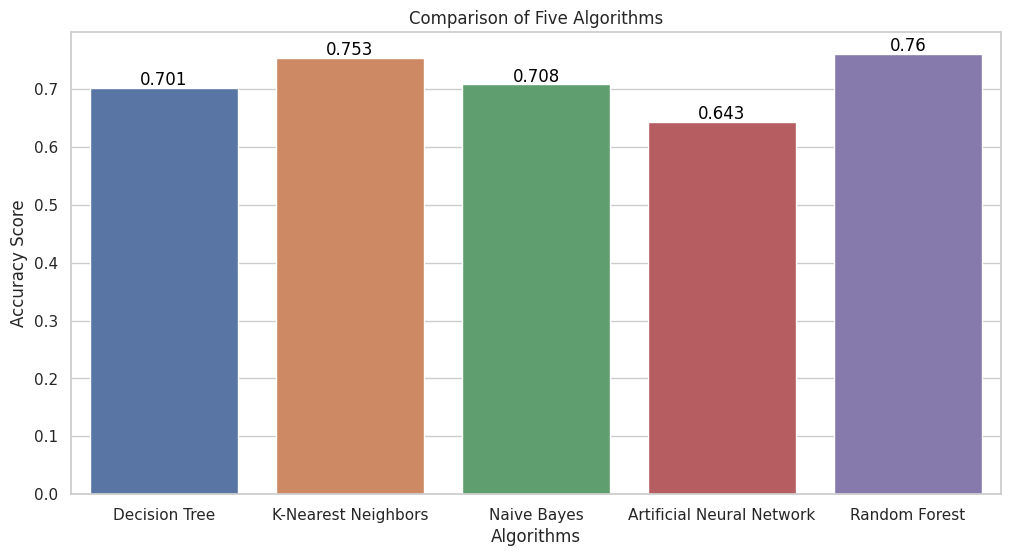

In [64]:
algorithms = ['Decision Tree', 'K-Nearest Neighbors', 'Naive Bayes', 'Artificial Neural Network', 'Random Forest']
accuracy_scores = [DT_ACC, KNN_ACC, NB_ACC,  ANN_ACC, RF_ACC]

sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))

ax = sns.barplot(x=algorithms, y=accuracy_scores)
ax.set_title('Comparison of Five Algorithms')
ax.set_xlabel('Algorithms')
ax.set_ylabel('Accuracy Score')

for i, v in enumerate(accuracy_scores):
    ax.text(i, v + 0.005, str(round(v, 3)), fontsize=12, color='black', ha='center')

plt.show()

### Creating a Custom Function for Comparing Metrics

In [65]:
# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def metrics_calculator(y_test, y_pred, model_name):
    '''
    This function calculates all desired performance metrics for a given model.
    '''
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro')],
                          index=['Accuracy','Precision','Recall','F1-score'],
                          columns=[model_name])

    # Adding background gradient and color scale
    cmap = 'YlGnBu'  # Choose colormap
    vmin = result.min().min()
    vmax = result.max().max()
    styled_result = result.style.background_gradient(cmap=cmap, vmin=vmin, vmax=vmax)

    return styled_result

### Now using the above function calculating Accuracy, Precision, Recall, F1-score

In [66]:
DT_result = metrics_calculator(y_test, DT_pred, 'Decision Tree')
KNN_result = metrics_calculator(y_test, KNN_pred, 'K-Nearest Neighbors')
NB_result = metrics_calculator(y_test, NB_pred, 'Naive Bayes')
ANN_result = metrics_calculator(y_test, ANN_pred, 'Artificial Neural Network')
RF_result = metrics_calculator(y_test, RF_pred, 'Random Forest')

# Convert styled DataFrames to regular DataFrames
decision_tree_result_df = DT_result.data
knn_result_df = KNN_result.data
naive_bayes_result_df = NB_result.data
artificial_neural_network_result_df = ANN_result.data
random_forest_result_df = RF_result.data

Five_models = pd.concat([decision_tree_result_df, knn_result_df, naive_bayes_result_df, artificial_neural_network_result_df, random_forest_result_df], axis=1)

# Applying styling to the concatenated DataFrame
styled_four = Five_models.style\
    .set_properties(**{'text-align': 'center', 'border': '1px solid black !important'})\
    .set_table_attributes('class="dataframe"')\
    .set_caption('Four Model Performance Metrics')\
    .background_gradient(cmap='YlGnBu', vmin=Five_models.min().min(), vmax=Five_models.max().max())

display(styled_four)

,Decision Tree,K-Nearest Neighbors,Naive Bayes,Artificial Neural Network,Random Forest
Accuracy,0.701299,0.753247,0.707792,0.642857,0.759740
Precision,0.676072,0.731179,0.683728,0.610000,0.738499
Recall,0.678788,0.727273,0.687879,0.609091,0.732323
F1-score,0.677296,0.729074,0.685500,0.609515,0.735063


# Confusion Matrix of Four Algorithms

In [67]:
from sklearn.metrics import confusion_matrix

# Define a function to plot the confusion matrix
def plot_confusion_matrix(cm, title):
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title)
    plt.show()


# Generate the confusion matrix
DTC_cm = confusion_matrix(y_test, DT_pred)
KNN_cm = confusion_matrix(y_test, KNN_pred)
NB_cm = confusion_matrix(y_test, NB_pred)
ANN_cm = confusion_matrix(y_test, ANN_pred)
RF_cm = confusion_matrix(y_test, RF_pred)

### Plot the confusion matrix for each classifier

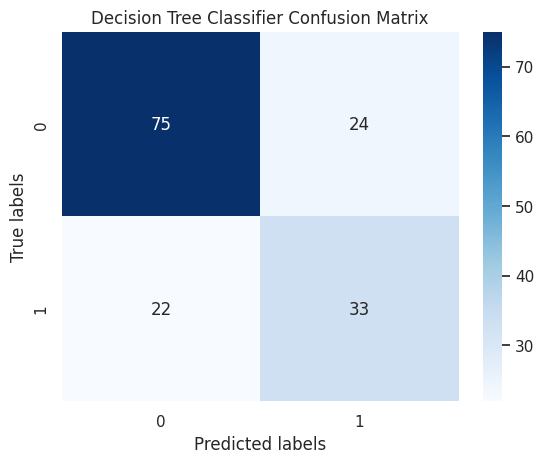

In [68]:
plot_confusion_matrix(DTC_cm, "Decision Tree Classifier Confusion Matrix")

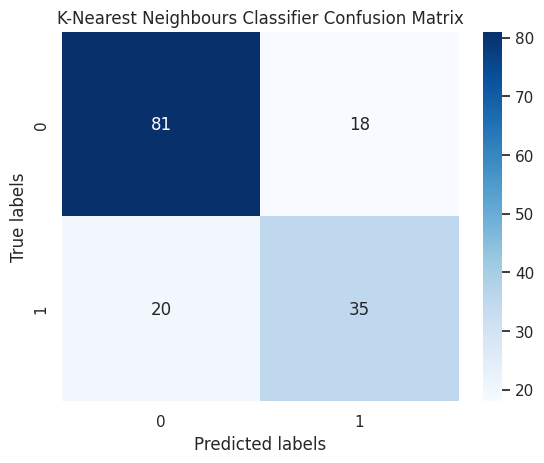

In [69]:
plot_confusion_matrix(KNN_cm, "K-Nearest Neighbours Classifier Confusion Matrix")

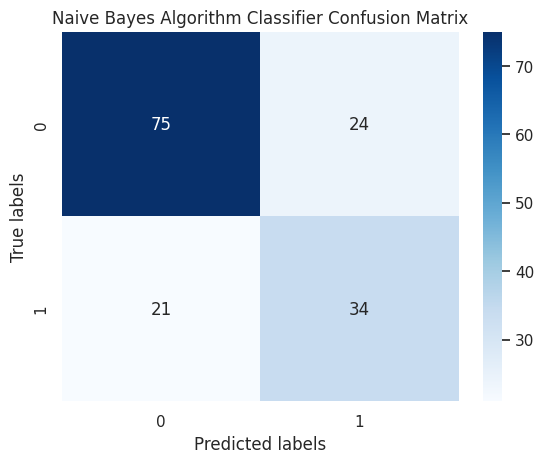

In [70]:
plot_confusion_matrix(NB_cm, "Naive Bayes Algorithm Classifier Confusion Matrix")

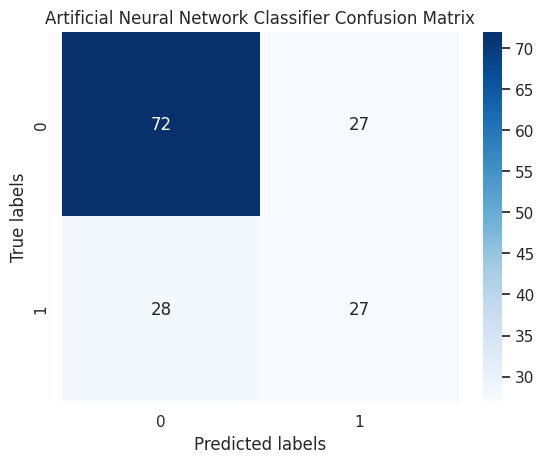

In [71]:
plot_confusion_matrix(ANN_cm, "Artificial Neural Network Classifier Confusion Matrix")

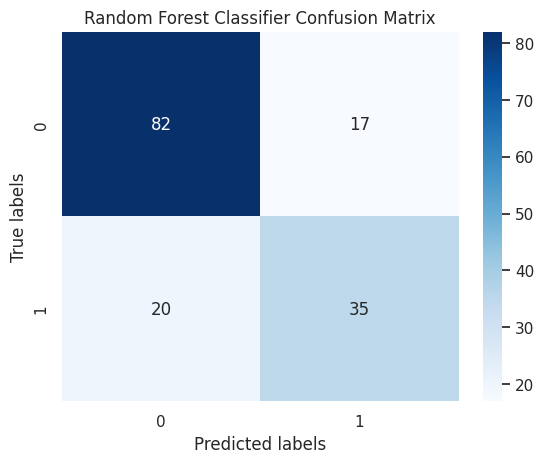

In [72]:
plot_confusion_matrix(RF_cm, "Random Forest Classifier Confusion Matrix")